In [1]:
# Explore the methods (decision tree, random forests, bagging, and AdaBoost, gradient boost) for actor classification.

In [236]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms

import seaborn as sns

from sklearn import tree
from sklearn.ensemble import IsolationForest, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

#import graphviz

0
1
2
3
4
5
6
7
8
9


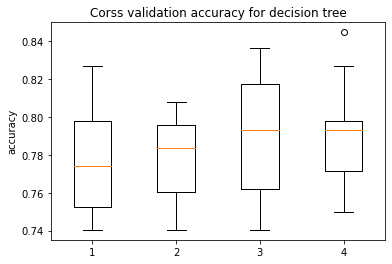


List of possible accuracy 1:
Maximum Accuracy That can be obtained from this model is: 82.6923076923077 %
Minimum Accuracy: 74.03846153846155 %
Overall Accuracy: 77.768857356236 %
Standard Deviation is: 0.02868206552117611

List of possible accuracy 2:
Maximum Accuracy That can be obtained from this model is: 80.76923076923077 %
Minimum Accuracy: 74.03846153846155 %
Overall Accuracy: 77.76512322628828 %
Standard Deviation is: 0.025211822691360748

List of possible accuracy 3:
Maximum Accuracy That can be obtained from this model is: 83.65384615384616 %
Minimum Accuracy: 74.03846153846155 %
Overall Accuracy: 79.11781179985063 %
Standard Deviation is: 0.03343707387010802

List of possible accuracy 4:
Maximum Accuracy That can be obtained from this model is: 84.46601941747572 %
Minimum Accuracy: 75.0 %
Overall Accuracy: 79.1196788648245 %
Standard Deviation is: 0.029085694100787186


In [200]:
#################
# Decision Tree #
#################

# Load train.csv
csv = pd.read_csv('train.csv')

# Total words, 'Number of words lead', 'Year', 'Gross', 'Number of words lead', 'Mean Age Male', 'Mean Age Female'
X_csv = csv.drop(columns=['Lead', 'Total words'])
y_csv = csv['Lead']

n_fold = 10
max_depth_dt = 20

accuracy = np.zeros((n_fold, 4))

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
lst_accu_stratified_1 = []
lst_accu_stratified_2 = []
lst_accu_stratified_3 = []
lst_accu_stratified_4 = []

for i, (train_index, val_index) in enumerate(skf.split(X_csv, y_csv)):
    
    print(i)
    
    X_train, X_val = X_csv.iloc[train_index], X_csv.iloc[val_index]
    y_train, y_val = y_csv.iloc[train_index], y_csv.iloc[val_index]
    
#     print(X_train.shape, y_train.shape)
#     print(X_val.shape, y_val.shape)
    
    # 1. Data Normalization
    X_train_normalized = preprocessing.normalize(X_train)
    # 2. Data Standardization
    X_train_standardized = preprocessing.scale(X_train)

    X_train_active = X_train_normalized
    
    X_val_normalized = preprocessing.normalize(X_val)
    X_val_standardized = preprocessing.scale(X_val)
    
    X_val_active = X_val_normalized
    
    # 1. Isolation Forest
    iso = IsolationForest(contamination=0.02)
    yhat = iso.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_1, y_train_ol_1 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_1.shape, y_train_ol_1.shape)

    model_dt_1 = tree.DecisionTreeClassifier(max_depth=max_depth_dt)
    model_dt_1.fit(X=X_train_ol_1, y=y_train_ol_1)
    y_predict_1 = model_dt_1.predict(X_val_active)
    
    accuracy[i, 0] = np.mean(y_predict_1 == y_val)
    lst_accu_stratified_1.append(model_dt_1.score(X_val_active, y_val))

    # 2. Minimum Covariance Determinant
    ee = EllipticEnvelope(contamination=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_2, y_train_ol_2 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_2.shape, y_train_ol_2.shape)

    model_dt_2 = tree.DecisionTreeClassifier(max_depth=max_depth_dt)
    model_dt_2.fit(X=X_train_ol_2, y=y_train_ol_2)
    y_predict_2 = model_dt_2.predict(X_val_active)
    
    accuracy[i, 1] = np.mean(y_predict_2 == y_val)
    lst_accu_stratified_2.append(model_dt_2.score(X_val_active, y_val))

    # 3. Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.02)
    yhat = lof.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_3, y_train_ol_3 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_3.shape, y_train_ol_3.shape)

    model_dt_3 = tree.DecisionTreeClassifier(max_depth=max_depth_dt)
    model_dt_3.fit(X=X_train_ol_3, y=y_train_ol_3)
    y_predict_3 = model_dt_3.predict(X_val_active)
    
    accuracy[i, 2] = np.mean(y_predict_3 == y_val)
    lst_accu_stratified_3.append(model_dt_3.score(X_val_active, y_val))
    
    # 4. One-Class SVM
    ee = OneClassSVM(nu=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_4, y_train_ol_4 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_4.shape, y_train_ol_4.shape)
    
    model_dt_4 = tree.DecisionTreeClassifier(max_depth=max_depth_dt)
    model_dt_4.fit(X=X_train_ol_4, y=y_train_ol_4)
    y_predict_4 = model_dt_4.predict(X_val_active)
    
    accuracy[i, 3] = np.mean(y_predict_4 == y_val)
    lst_accu_stratified_4.append(model_dt_4.score(X_val_active, y_val))
    

    
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for decision tree')
plt.xticks(np.arange(4) + 1, ('1', '2', '3', '4'))
plt.ylabel('accuracy')
plt.show()
    
# Print the output.
print('\nList of possible accuracy 1:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_1)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_1)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_1)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_1))

print('\nList of possible accuracy 2:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_2)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_2)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_2)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_2))

print('\nList of possible accuracy 3:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_3)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_3)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_3)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_3))

print('\nList of possible accuracy 4:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_4)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_4)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_4)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_4))

0
1
2
3
4
5
6
7
8
9


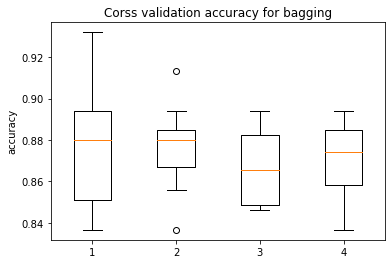


List of possible accuracy 1:
Maximum Accuracy That can be obtained from this model is: 93.20388349514563 %
Minimum Accuracy: 83.65384615384616 %
Overall Accuracy: 87.68577296489917 %
Standard Deviation is: 0.02916768935467474

List of possible accuracy 2:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 83.65384615384616 %
Overall Accuracy: 87.67923823749067 %
Standard Deviation is: 0.02124660146665896

List of possible accuracy 3:
Maximum Accuracy That can be obtained from this model is: 89.42307692307693 %
Minimum Accuracy: 84.61538461538461 %
Overall Accuracy: 86.72050037341299 %
Standard Deviation is: 0.018965100450631874

List of possible accuracy 4:
Maximum Accuracy That can be obtained from this model is: 89.42307692307693 %
Minimum Accuracy: 83.65384615384616 %
Overall Accuracy: 86.91094100074682 %
Standard Deviation is: 0.020337512244850437


In [204]:
###########
# Bagging #
###########

# Load train.csv
csv = pd.read_csv('train.csv')

# 'Number of words lead', 'Year', 'Gross', 'Number of words lead', 'Mean Age Male', 'Mean Age Female'
X_csv = csv.drop(columns=['Lead'])
y_csv = csv['Lead']

n_fold = 10
n_estimators_bag = 150

accuracy = np.zeros((n_fold, 4))

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
lst_accu_stratified_1 = []
lst_accu_stratified_2 = []
lst_accu_stratified_3 = []
lst_accu_stratified_4 = []

for i, (train_index, val_index) in enumerate(skf.split(X_csv, y_csv)):
    
    print(i)
    
    X_train, X_val = X_csv.iloc[train_index], X_csv.iloc[val_index]
    y_train, y_val = y_csv.iloc[train_index], y_csv.iloc[val_index]
    
#     print(X_train.shape, y_train.shape)
#     print(X_val.shape, y_val.shape)
    
    # 1. Data Normalization
    X_train_normalized = preprocessing.normalize(X_train)
    # 2. Data Standardization
    X_train_standardized = preprocessing.scale(X_train)

    X_train_active = X_train_normalized
    
    X_val_normalized = preprocessing.normalize(X_val)
    X_val_standardized = preprocessing.scale(X_val)
    
    X_val_active = X_val_normalized
    
    # 1. Isolation Forest
    iso = IsolationForest(contamination=0.02)
    yhat = iso.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_1, y_train_ol_1 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_1.shape, y_train_ol_1.shape)

    model_bag_1 = BaggingClassifier(n_estimators=n_estimators_bag)
    model_bag_1.fit(X=X_train_ol_1, y=y_train_ol_1)
    y_predict_1 = model_bag_1.predict(X_val_active)
    
    accuracy[i, 0] = np.mean(y_predict_1 == y_val)
    lst_accu_stratified_1.append(model_bag_1.score(X_val_active, y_val))

    # 2. Minimum Covariance Determinant
    ee = EllipticEnvelope(contamination=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_2, y_train_ol_2 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_2.shape, y_train_ol_2.shape)

    model_bag_2 = BaggingClassifier(n_estimators=n_estimators_bag)
    model_bag_2.fit(X=X_train_ol_2, y=y_train_ol_2)
    y_predict_2 = model_bag_2.predict(X_val_active)
    
    accuracy[i, 1] = np.mean(y_predict_2 == y_val)
    lst_accu_stratified_2.append(model_bag_2.score(X_val_active, y_val))

    # 3. Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.02)
    yhat = lof.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_3, y_train_ol_3 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_3.shape, y_train_ol_3.shape)

    model_bag_3 = BaggingClassifier(n_estimators=n_estimators_bag)
    model_bag_3.fit(X=X_train_ol_3, y=y_train_ol_3)
    y_predict_3 = model_bag_3.predict(X_val_active)
    
    accuracy[i, 2] = np.mean(y_predict_3 == y_val)
    lst_accu_stratified_3.append(model_bag_3.score(X_val_active, y_val))
    
    # 4. One-Class SVM
    ee = OneClassSVM(nu=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_4, y_train_ol_4 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_4.shape, y_train_ol_4.shape)
    
    model_bag_4 = BaggingClassifier(n_estimators=n_estimators_bag)
    model_bag_4.fit(X=X_train_ol_4, y=y_train_ol_4)
    y_predict_4 = model_bag_4.predict(X_val_active)
    
    accuracy[i, 3] = np.mean(y_predict_4 == y_val)
    lst_accu_stratified_4.append(model_bag_4.score(X_val_active, y_val))
    

    
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for bagging')
plt.xticks(np.arange(4) + 1, ('1', '2', '3', '4'))
plt.ylabel('accuracy')
plt.show()
    
# Print the output.
print('\nList of possible accuracy 1:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_1)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_1)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_1)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_1))

print('\nList of possible accuracy 2:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_2)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_2)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_2)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_2))

print('\nList of possible accuracy 3:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_3)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_3)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_3)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_3))

print('\nList of possible accuracy 4:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_4)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_4)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_4)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_4))


0
1
2
3
4
5
6
7
8
9


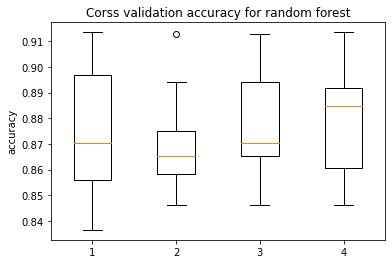


List of possible accuracy 1:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 83.65384615384616 %
Overall Accuracy: 87.49159820761763 %
Standard Deviation is: 0.02668311915381308

List of possible accuracy 2:
Maximum Accuracy That can be obtained from this model is: 91.2621359223301 %
Minimum Accuracy: 84.61538461538461 %
Overall Accuracy: 87.10698282300224 %
Standard Deviation is: 0.0196633869571399

List of possible accuracy 3:
Maximum Accuracy That can be obtained from this model is: 91.2621359223301 %
Minimum Accuracy: 84.61538461538461 %
Overall Accuracy: 87.68390589992532 %
Standard Deviation is: 0.021003445977138088

List of possible accuracy 4:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 84.61538461538461 %
Overall Accuracy: 88.06852128454071 %
Standard Deviation is: 0.02307084516802744


In [220]:
#################
# Random Forest #
#################

# Best performance: n_estimators_gb = 200, drop 'Total words', 'Gross', 'Year', normalized, One-Class SVM outlier removal.

# Load train.csv
csv = pd.read_csv('train.csv')

# 'Total words', 'Number of words lead', 'Year', 'Gross', 'Number of words lead', 'Mean Age Male', 'Mean Age Female'
X_csv = csv.drop(columns=['Lead', 'Total words', 'Gross', 'Year'])
y_csv = csv['Lead']

n_fold = 10
n_estimators_rf = 200
max_depth_rf = None

accuracy = np.zeros((n_fold, 4))

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
lst_accu_stratified_1 = []
lst_accu_stratified_2 = []
lst_accu_stratified_3 = []
lst_accu_stratified_4 = []

for i, (train_index, val_index) in enumerate(skf.split(X_csv, y_csv)):
    
    print(i)
    
    X_train, X_val = X_csv.iloc[train_index], X_csv.iloc[val_index]
    y_train, y_val = y_csv.iloc[train_index], y_csv.iloc[val_index]
    
#     print(X_train.shape, y_train.shape)
#     print(X_val.shape, y_val.shape)
    
    # 1. Data Normalization
    X_train_normalized = preprocessing.normalize(X_train)
    # 2. Data Standardization
    X_train_standardized = preprocessing.scale(X_train)

    X_train_active = X_train_normalized
    
    X_val_normalized = preprocessing.normalize(X_val)
    X_val_standardized = preprocessing.scale(X_val)
    
    X_val_active = X_val_normalized
    
    # 1. Isolation Forest
    iso = IsolationForest(contamination=0.02)
    yhat = iso.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_1, y_train_ol_1 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_1.shape, y_train_ol_1.shape)

    model_rf_1 = RandomForestClassifier(n_estimators=n_estimators_rf, max_depth=max_depth_rf)
    model_rf_1.fit(X=X_train_ol_1, y=y_train_ol_1)
    y_predict_1 = model_rf_1.predict(X_val_active)
    
    accuracy[i, 0] = np.mean(y_predict_1 == y_val)
    lst_accu_stratified_1.append(model_rf_1.score(X_val_active, y_val))

    # 2. Minimum Covariance Determinant
    ee = EllipticEnvelope(contamination=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_2, y_train_ol_2 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_2.shape, y_train_ol_2.shape)

    model_rf_2 = RandomForestClassifier(n_estimators=n_estimators_rf, max_depth=max_depth_rf)
    model_rf_2.fit(X=X_train_ol_2, y=y_train_ol_2)
    y_predict_2 = model_rf_2.predict(X_val_active)
    
    accuracy[i, 1] = np.mean(y_predict_2 == y_val)
    lst_accu_stratified_2.append(model_rf_2.score(X_val_active, y_val))

    # 3. Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.02)
    yhat = lof.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_3, y_train_ol_3 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_3.shape, y_train_ol_3.shape)

    model_rf_3 = RandomForestClassifier(n_estimators=n_estimators_rf, max_depth=max_depth_rf)
    model_rf_3.fit(X=X_train_ol_3, y=y_train_ol_3)
    y_predict_3 = model_rf_3.predict(X_val_active)
    
    accuracy[i, 2] = np.mean(y_predict_3 == y_val)
    lst_accu_stratified_3.append(model_rf_3.score(X_val_active, y_val))
    
    # 4. One-Class SVM
    ee = OneClassSVM(nu=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_4, y_train_ol_4 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_4.shape, y_train_ol_4.shape)
    
    model_rf_4 = RandomForestClassifier(n_estimators=n_estimators_rf, max_depth=max_depth_rf)
    model_rf_4.fit(X=X_train_ol_4, y=y_train_ol_4)
    y_predict_4 = model_rf_4.predict(X_val_active)
    
    accuracy[i, 3] = np.mean(y_predict_4 == y_val)
    lst_accu_stratified_4.append(model_rf_4.score(X_val_active, y_val))
    

    
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for random forest')
plt.xticks(np.arange(4) + 1, ('1', '2', '3', '4'))
plt.ylabel('accuracy')
plt.show()
    
# Print the output.
print('\nList of possible accuracy 1:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_1)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_1)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_1)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_1))

print('\nList of possible accuracy 2:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_2)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_2)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_2)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_2))

print('\nList of possible accuracy 3:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_3)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_3)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_3)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_3))

print('\nList of possible accuracy 4:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_4)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_4)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_4)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_4))

0
1
2
3
4
5
6
7
8
9


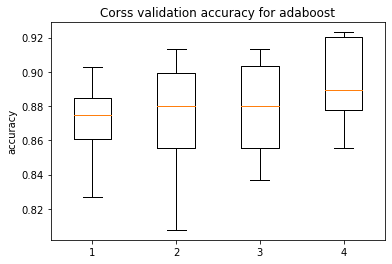


List of possible accuracy 1:
Maximum Accuracy That can be obtained from this model is: 90.29126213592234 %
Minimum Accuracy: 82.6923076923077 %
Overall Accuracy: 87.1060492905153 %
Standard Deviation is: 0.024356504848763175

List of possible accuracy 2:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 80.76923076923077 %
Overall Accuracy: 87.10698282300224 %
Standard Deviation is: 0.037051883629740344

List of possible accuracy 3:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 83.65384615384616 %
Overall Accuracy: 87.87528005974607 %
Standard Deviation is: 0.02970647776484783

List of possible accuracy 4:
Maximum Accuracy That can be obtained from this model is: 92.3076923076923 %
Minimum Accuracy: 85.57692307692307 %
Overall Accuracy: 89.41560866318147 %
Standard Deviation is: 0.02514328799342205


In [235]:
############
# AdaBoost #
############

# Load train.csv
csv = pd.read_csv('train.csv')

# 'Number of words lead', 'Year', 'Gross', 'Number of words lead', 'Mean Age Male', 'Mean Age Female'
X_csv = csv.drop(columns=['Lead', 'Mean Age Male', 'Gross', 'Year'])
y_csv = csv['Lead']

n_fold = 10
n_estimators_ada = 150

accuracy = np.zeros((n_fold, 4))

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
lst_accu_stratified_1 = []
lst_accu_stratified_2 = []
lst_accu_stratified_3 = []
lst_accu_stratified_4 = []

for i, (train_index, val_index) in enumerate(skf.split(X_csv, y_csv)):
    
    print(i)
    
    X_train, X_val = X_csv.iloc[train_index], X_csv.iloc[val_index]
    y_train, y_val = y_csv.iloc[train_index], y_csv.iloc[val_index]
    
#     print(X_train.shape, y_train.shape)
#     print(X_val.shape, y_val.shape)
    
    # 1. Data Normalization
    X_train_normalized = preprocessing.normalize(X_train)
    # 2. Data Standardization
    X_train_standardized = preprocessing.scale(X_train)

    X_train_active = X_train_normalized
    
    X_val_normalized = preprocessing.normalize(X_val)
    X_val_standardized = preprocessing.scale(X_val)
    
    X_val_active = X_val_normalized
    
    # 1. Isolation Forest
    iso = IsolationForest(contamination=0.02)
    yhat = iso.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_1, y_train_ol_1 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_1.shape, y_train_ol_1.shape)

    model_ada_1 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_1.fit(X=X_train_ol_1, y=y_train_ol_1)
    y_predict_1 = model_ada_1.predict(X_val_active)
    
    accuracy[i, 0] = np.mean(y_predict_1 == y_val)
    lst_accu_stratified_1.append(model_ada_1.score(X_val_active, y_val))

    # 2. Minimum Covariance Determinant
    ee = EllipticEnvelope(contamination=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_2, y_train_ol_2 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_2.shape, y_train_ol_2.shape)

    model_ada_2 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_2.fit(X=X_train_ol_2, y=y_train_ol_2)
    y_predict_2 = model_ada_2.predict(X_val_active)
    
    accuracy[i, 1] = np.mean(y_predict_2 == y_val)
    lst_accu_stratified_2.append(model_ada_2.score(X_val_active, y_val))

    # 3. Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.02)
    yhat = lof.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_3, y_train_ol_3 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_3.shape, y_train_ol_3.shape)

    model_ada_3 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_3.fit(X=X_train_ol_3, y=y_train_ol_3)
    y_predict_3 = model_ada_3.predict(X_val_active)
    
    accuracy[i, 2] = np.mean(y_predict_3 == y_val)
    lst_accu_stratified_3.append(model_ada_3.score(X_val_active, y_val))
    
    # 4. One-Class SVM
    ee = OneClassSVM(nu=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_4, y_train_ol_4 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_4.shape, y_train_ol_4.shape)
    
    model_ada_4 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_4.fit(X=X_train_ol_4, y=y_train_ol_4)
    y_predict_4 = model_ada_4.predict(X_val_active)
    
    accuracy[i, 3] = np.mean(y_predict_4 == y_val)
    lst_accu_stratified_4.append(model_ada_4.score(X_val_active, y_val))
    

    
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for adaboost')
plt.xticks(np.arange(4) + 1, ('1', '2', '3', '4'))
plt.ylabel('accuracy')
plt.show()
    
# Print the output.
print('\nList of possible accuracy 1:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_1)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_1)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_1)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_1))

print('\nList of possible accuracy 2:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_2)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_2)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_2)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_2))

print('\nList of possible accuracy 3:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_3)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_3)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_3)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_3))

print('\nList of possible accuracy 4:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_4)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_4)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_4)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_4))

0
1
2
3
4
5
6
7
8
9


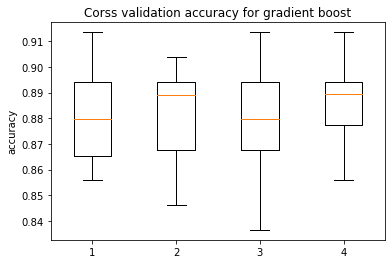


List of possible accuracy 1:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 85.57692307692307 %
Overall Accuracy: 88.16467513069455 %
Standard Deviation is: 0.021626938926582007

List of possible accuracy 2:
Maximum Accuracy That can be obtained from this model is: 90.38461538461539 %
Minimum Accuracy: 84.61538461538461 %
Overall Accuracy: 88.06665421956684 %
Standard Deviation is: 0.019260456717256624

List of possible accuracy 3:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 83.65384615384616 %
Overall Accuracy: 88.06758775205378 %
Standard Deviation is: 0.02219246691719774

List of possible accuracy 4:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 85.57692307692307 %
Overall Accuracy: 88.83775205377147 %
Standard Deviation is: 0.01754130755514988


In [240]:
# Rescaling Data for Machine Learning in Python with Scikit-Learn:
# https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

##################
# Gradient Boost #
##################

# Best performance: n_estimators_gb = 150, drop 'Total words', normalized, One-Class SVM outlier removal.

# Load train.csv
csv = pd.read_csv('train.csv')

# 'Number of words lead', 'Year', 'Gross', 'Number of words lead', 'Mean Age Male', 'Mean Age Female'
X_csv = csv.drop(columns=['Lead', 'Total words'])
y_csv = csv['Lead']

n_fold = 10
n_estimators_gb = 150

accuracy = np.zeros((n_fold, 4))

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
lst_accu_stratified_1 = []
lst_accu_stratified_2 = []
lst_accu_stratified_3 = []
lst_accu_stratified_4 = []

for i, (train_index, val_index) in enumerate(skf.split(X_csv, y_csv)):
    
    print(i)
    
    X_train, X_val = X_csv.iloc[train_index], X_csv.iloc[val_index]
    y_train, y_val = y_csv.iloc[train_index], y_csv.iloc[val_index]
    
#     print(X_train.shape, y_train.shape)
#     print(X_val.shape, y_val.shape)
    
    # 1. Data Normalization
    X_train_normalized = preprocessing.normalize(X_train)
    # 2. Data Standardization
    X_train_standardized = preprocessing.scale(X_train)

    X_train_active = X_train_normalized
    
    X_val_normalized = preprocessing.normalize(X_val)
    X_val_standardized = preprocessing.scale(X_val)
    
    X_val_active = X_val_normalized
    
    # 1. Isolation Forest
    iso = IsolationForest(contamination=0.02)
    yhat = iso.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_1, y_train_ol_1 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_1.shape, y_train_ol_1.shape)

    model_gb_1 = GradientBoostingClassifier(n_estimators=n_estimators_gb)
    model_gb_1.fit(X=X_train_ol_1, y=y_train_ol_1)
    y_predict_1 = model_gb_1.predict(X_val_active)
    
    accuracy[i, 0] = np.mean(y_predict_1 == y_val)
    lst_accu_stratified_1.append(model_gb_1.score(X_val_active, y_val))

    # 2. Minimum Covariance Determinant
    ee = EllipticEnvelope(contamination=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_2, y_train_ol_2 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_2.shape, y_train_ol_2.shape)

    model_gb_2 = GradientBoostingClassifier(n_estimators=n_estimators_gb)
    model_gb_2.fit(X=X_train_ol_2, y=y_train_ol_2)
    y_predict_2 = model_gb_2.predict(X_val_active)
    
    accuracy[i, 1] = np.mean(y_predict_2 == y_val)
    lst_accu_stratified_2.append(model_gb_2.score(X_val_active, y_val))

    # 3. Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.02)
    yhat = lof.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_3, y_train_ol_3 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_3.shape, y_train_ol_3.shape)

    model_gb_3 = GradientBoostingClassifier(n_estimators=n_estimators_gb)
    model_gb_3.fit(X=X_train_ol_3, y=y_train_ol_3)
    y_predict_3 = model_gb_3.predict(X_val_active)
    
    accuracy[i, 2] = np.mean(y_predict_3 == y_val)
    lst_accu_stratified_3.append(model_gb_3.score(X_val_active, y_val))
    
    # 4. One-Class SVM
    ee = OneClassSVM(nu=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_4, y_train_ol_4 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_4.shape, y_train_ol_4.shape)
    
    model_gb_4 = GradientBoostingClassifier(n_estimators=n_estimators_gb)
    model_gb_4.fit(X=X_train_ol_4, y=y_train_ol_4)
    y_predict_4 = model_gb_4.predict(X_val_active)
    
    accuracy[i, 3] = np.mean(y_predict_4 == y_val)
    lst_accu_stratified_4.append(model_gb_4.score(X_val_active, y_val))
    

    
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for gradient boost')
plt.xticks(np.arange(4) + 1, ('1', '2', '3', '4'))
plt.ylabel('accuracy')
plt.show()
    
# Print the output.
print('\nList of possible accuracy 1:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_1)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_1)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_1)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_1))

print('\nList of possible accuracy 2:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_2)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_2)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_2)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_2))

print('\nList of possible accuracy 3:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_3)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_3)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_3)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_3))

print('\nList of possible accuracy 4:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_4)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_4)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_4)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_4))

In [137]:
# Outliers removal process
# (1. Isolation Forest or 2. Minimum Covariance Determinant or 3. Local Outlier Factor 4. One-Class SVM)

# 1. Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train_active)
mask = yhat != -1
X_train_ol_1, y_train_ol_1 = X_train_active[mask, :], y_train[mask]
print(X_train_ol_1.shape, y_train_ol_1.shape)


# 2. Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train_active)
mask = yhat != -1
X_train_ol_2, y_train_ol_2 = X_train_active[mask, :], y_train[mask]
print(X_train_ol_2.shape, y_train_ol_2.shape)


# 3. Local Outlier Factor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train_active)
mask = yhat != -1
X_train_ol_3, y_train_ol_3 = X_train_active[mask, :], y_train[mask]
print(X_train_ol_3.shape, y_train_ol_3.shape)

# 4. One-Class SVM
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train_active)
mask = yhat != -1
X_train_ol_4, y_train_ol_4 = X_train_active[mask, :], y_train[mask]
print(X_train_ol_4.shape, y_train_ol_4.shape)

(701, 13) (701,)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-53.633792629198311 > -53.771059490795622). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-52.229420335911662 > -54.153553559390801). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn("Determinant has increased; this should not happen

(771, 13) (771,)
(760, 13) (760,)
(724, 13) (724,)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-52.826517705521113 > -53.932951103690677). You may want to try with a higher value of support_fraction (current value: 0.510).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-52.327031729167075 > -52.465293333912875). You may want to try with a higher value of support_fraction (current value: 0.510).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-53.135436229128857 > -53.280713539893114). Yo

Accuracy rate of gradient is 0.83
              precision    recall  f1-score   support

      Female       0.68      0.71      0.69        68
        Male       0.89      0.88      0.89       192

    accuracy                           0.83       260
   macro avg       0.79      0.79      0.79       260
weighted avg       0.84      0.83      0.84       260



<AxesSubplot:>

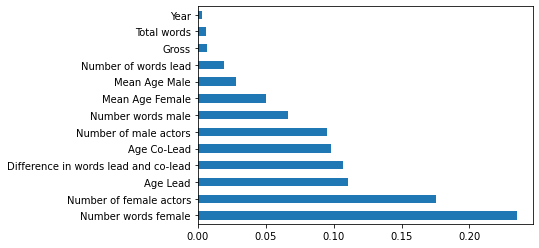

In [139]:
# feature removal

X_test_normalized = preprocessing.normalize(X_test)
X_test_standardized = preprocessing.scale(X_test)

model_gb = GradientBoostingClassifier()
model_gb.fit(X=X_train_ol_3, y=y_train_ol_3)
y_predict = model_gb.predict(X_test_standardized)
print('Accuracy rate of gradient is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

feat_importance_dt = pd.Series(model_gb.feature_importances_, index= X_train.columns)
feat_importance_dt.nlargest(13).plot(kind='barh')

In [ ]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X=X_train, y=y_train)
y_predict = model_gb.predict(X_test)
print('Accuracy rate of gradient is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

In [4]:
# Learn a classification tree
X_train = train.drop(columns=['Lead'])
y_train = train['Lead']
model_dt = tree.DecisionTreeClassifier(max_depth=11)
model_dt.fit(X=X_train, y=y_train)

# Predict the response on the test data
X_test = test.drop(columns=['Lead'])
y_test = test['Lead']
y_predict = model_dt.predict(X_test)
print('Accuracy rate of classification tree is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of classification tree is 0.81
              precision    recall  f1-score   support

      Female       0.65      0.60      0.63        68
        Male       0.86      0.89      0.87       192

    accuracy                           0.81       260
   macro avg       0.76      0.74      0.75       260
weighted avg       0.81      0.81      0.81       260



In [5]:
# 2 - Bagging
model_bag = BaggingClassifier()
model_bag.fit(X=X_train, y=y_train)
y_predict = model_bag.predict(X_test)
print('Accuracy rate of bagging is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of bagging is 0.80
              precision    recall  f1-score   support

      Female       0.67      0.50      0.57        68
        Male       0.84      0.91      0.87       192

    accuracy                           0.80       260
   macro avg       0.75      0.71      0.72       260
weighted avg       0.79      0.80      0.79       260



In [6]:
# 3 - Random forest
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X=X_train, y=y_train)
y_predict = model_rf.predict(X_test)
print('Accuracy rate of random forest is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of random forest is 0.83
              precision    recall  f1-score   support

      Female       0.83      0.44      0.58        68
        Male       0.83      0.97      0.89       192

    accuracy                           0.83       260
   macro avg       0.83      0.70      0.74       260
weighted avg       0.83      0.83      0.81       260



In [7]:
# 4 - AdaBoost
model_ab = AdaBoostClassifier(n_estimators=50)
model_ab.fit(X=X_train, y=y_train)
y_predict = model_ab.predict(X_test)
print('Accuracy rate of adaboost is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of adaboost is 0.87
              precision    recall  f1-score   support

      Female       0.84      0.60      0.70        68
        Male       0.87      0.96      0.91       192

    accuracy                           0.87       260
   macro avg       0.85      0.78      0.81       260
weighted avg       0.86      0.87      0.86       260



In [8]:
# 5 - Gradient boosting
model_gb = GradientBoostingClassifier()
model_gb.fit(X=X_train, y=y_train)
y_predict = model_gb.predict(X_test)
print('Accuracy rate of gradient is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of gradient is 0.85
              precision    recall  f1-score   support

      Female       0.82      0.54      0.65        68
        Male       0.86      0.96      0.90       192

    accuracy                           0.85       260
   macro avg       0.84      0.75      0.78       260
weighted avg       0.85      0.85      0.84       260



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths

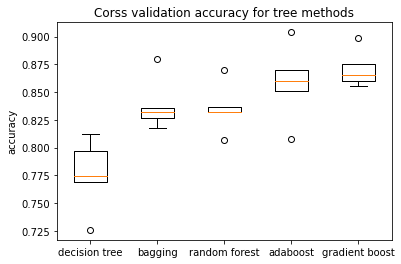

In [9]:
# 6 - Start to use cross validation to get the range of accuracy rate for each method
n_fold = 10

models = []
models.append(model_dt)
models.append(model_bag)
models.append(model_rf)
models.append(model_ab)
models.append(model_gb)

accuracy = np.zeros((n_fold, len(models)))
cv = skl_ms.KFold(n_splits=n_fold, random_state=1, shuffle=True)

X = train_csv.drop(columns=['Lead'])
y = train_csv['Lead']

for i, (train_index, val_index) in enumerate(cv.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    for m in range(np.shape(models)[0]):
        model = models[m]
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        accuracy[i, m] = np.mean(prediction == y_val)
        
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for tree methods')
plt.xticks(np.arange(5) + 1, ('decision tree', 'bagging', 'random forest', 'adaboost', 'gradient boost'))
plt.ylabel('accuracy')
plt.show()

<AxesSubplot:>

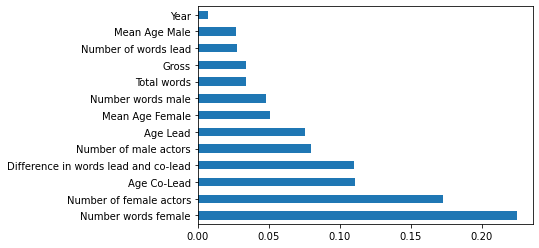

In [10]:
# 7 - Feature selection, first examine the feature importance for each method.
#
# Feature Selection Techniques:
# https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

# 4 Automatic Outlier Detection Algorithms in Python:
# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

# feature importance for decision tree
feat_importance_dt = pd.Series(model_dt.feature_importances_, index= X.columns)
feat_importance_dt.nlargest(13).plot(kind='barh')

<AxesSubplot:>

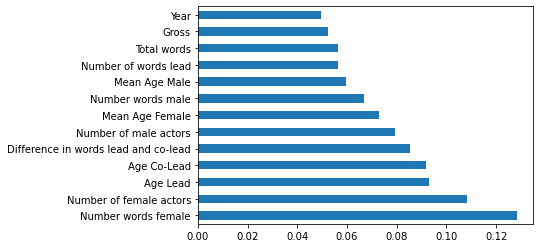

In [11]:
# feature importance for random forest
feat_importance_rf = pd.Series(model_rf.feature_importances_, index= X.columns)
feat_importance_rf.nlargest(13).plot(kind='barh')

<AxesSubplot:>

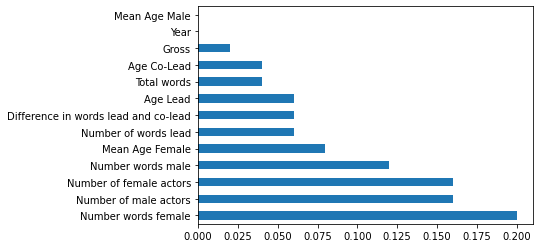

In [12]:
# feature importance for adaboost
feat_importance_ab = pd.Series(model_ab.feature_importances_, index= X.columns)
feat_importance_ab.nlargest(13).plot(kind='barh')

<AxesSubplot:>

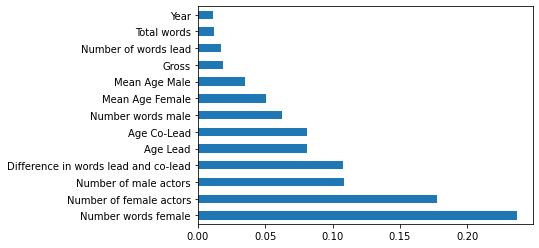

In [13]:
# feature importance for gradient boost
feat_importance_gb = pd.Series(model_gb.feature_importances_, index= X.columns)
feat_importance_gb.nlargest(13).plot(kind='barh')

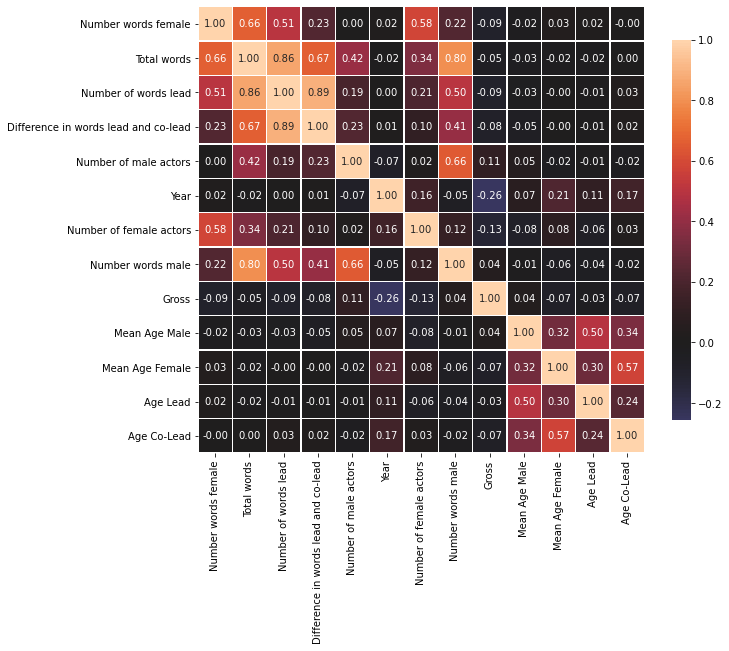

In [15]:
# Now, we examine the correlation between features

Numeric_df = pd.DataFrame(X_train)

corr= Numeric_df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths

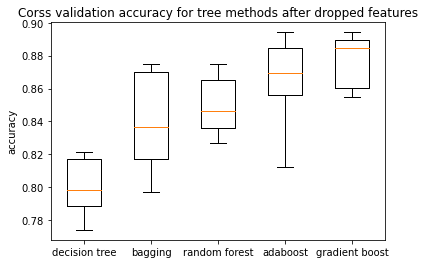

In [16]:
# Based on above analysis, we choose to exclude: 
# "Year", "Gross", "Total words", "Number of words lead", "Mean Age Male"

#X_train_feature_dropped = train.drop(columns=['Year', 'Gross', 'Total words', 'Number of words lead', 'Mean Age Male'])

X = train_csv.drop(columns=['Lead', 'Year', 'Gross', 'Total words'])
y = train_csv['Lead']

for i, (train_index, val_index) in enumerate(cv.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    for m in range(np.shape(models)[0]):
        model = models[m]
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        accuracy[i, m] = np.mean(prediction == y_val)
        
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for tree methods after dropped features')
plt.xticks(np.arange(5) + 1, ('decision tree', 'bagging', 'random forest', 'adaboost', 'gradient boost'))
plt.ylabel('accuracy')
plt.show()

In [17]:
trainIndex = np.random.choice(train_csv.shape[0], size=int(len(train_csv)*.75), replace=False)
train = train_csv.iloc[trainIndex]
test = train_csv.iloc[~train_csv.index.isin(trainIndex)]

X_train = train.drop(columns=['Lead', 'Year', 'Gross', 'Total words'])
y_train = train['Lead']

X_test = test.drop(columns=['Lead', 'Year', 'Gross', 'Total words'])
y_test = test['Lead']

model_dt = tree.DecisionTreeClassifier(max_depth=11)
model_dt.fit(X=X_train, y=y_train)
y_predict = model_dt.predict(X_test)
print('Accuracy rate of classification tree is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of classification tree is 0.78
              precision    recall  f1-score   support

      Female       0.53      0.55      0.54        60
        Male       0.86      0.85      0.86       200

    accuracy                           0.78       260
   macro avg       0.70      0.70      0.70       260
weighted avg       0.79      0.78      0.79       260



In [18]:
model_bag = BaggingClassifier()
model_bag.fit(X=X_train, y=y_train)
y_predict = model_bag.predict(X_test)
print('Accuracy rate of bagging is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of bagging is 0.82
              precision    recall  f1-score   support

      Female       0.62      0.50      0.56        60
        Male       0.86      0.91      0.88       200

    accuracy                           0.82       260
   macro avg       0.74      0.71      0.72       260
weighted avg       0.80      0.82      0.81       260



In [19]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X=X_train, y=y_train)
y_predict = model_rf.predict(X_test)
print('Accuracy rate of random forest is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of random forest is 0.83
              precision    recall  f1-score   support

      Female       0.73      0.40      0.52        60
        Male       0.84      0.95      0.89       200

    accuracy                           0.83       260
   macro avg       0.78      0.68      0.71       260
weighted avg       0.82      0.83      0.81       260



In [20]:
model_ab = AdaBoostClassifier(n_estimators=50)
model_ab.fit(X=X_train, y=y_train)
y_predict = model_ab.predict(X_test)
print('Accuracy rate of adaboost is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of adaboost is 0.86
              precision    recall  f1-score   support

      Female       0.74      0.58      0.65        60
        Male       0.88      0.94      0.91       200

    accuracy                           0.86       260
   macro avg       0.81      0.76      0.78       260
weighted avg       0.85      0.86      0.85       260



In [21]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X=X_train, y=y_train)
y_predict = model_gb.predict(X_test)
print('Accuracy rate of gradient is %.2f' % np.mean(y_predict == y_test))
print(classification_report(y_test,y_predict))

Accuracy rate of gradient is 0.87
              precision    recall  f1-score   support

      Female       0.82      0.53      0.65        60
        Male       0.87      0.96      0.92       200

    accuracy                           0.87       260
   macro avg       0.85      0.75      0.78       260
weighted avg       0.86      0.87      0.85       260

